# 1_Customer_segmentaion
using the cleaned data for PCA analysis and Clustering analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import PCA_functions
import Clustering_functions

In [2]:
# load and prepare
azdias_clean = PCA_functions.load_clean('azdias_clean')
customers_clean = PCA_functions.load_clean('customers_clean')

In [3]:
# create PCA df(s)
azdias_PCA_df, azdias_cum_explained_var_df, azdias_feature_weights = PCA_functions.create_PCA_and_cumulative_explained_variance(azdias_clean)


In [4]:
threshold = 0.8

N_features = PCA_functions.num_components_threshold(azdias_cum_explained_var_df, threshold)


<AxesSubplot:title={'center':'PCA Cumulative Variance'}, xlabel='Principal Components', ylabel='cum_var'>

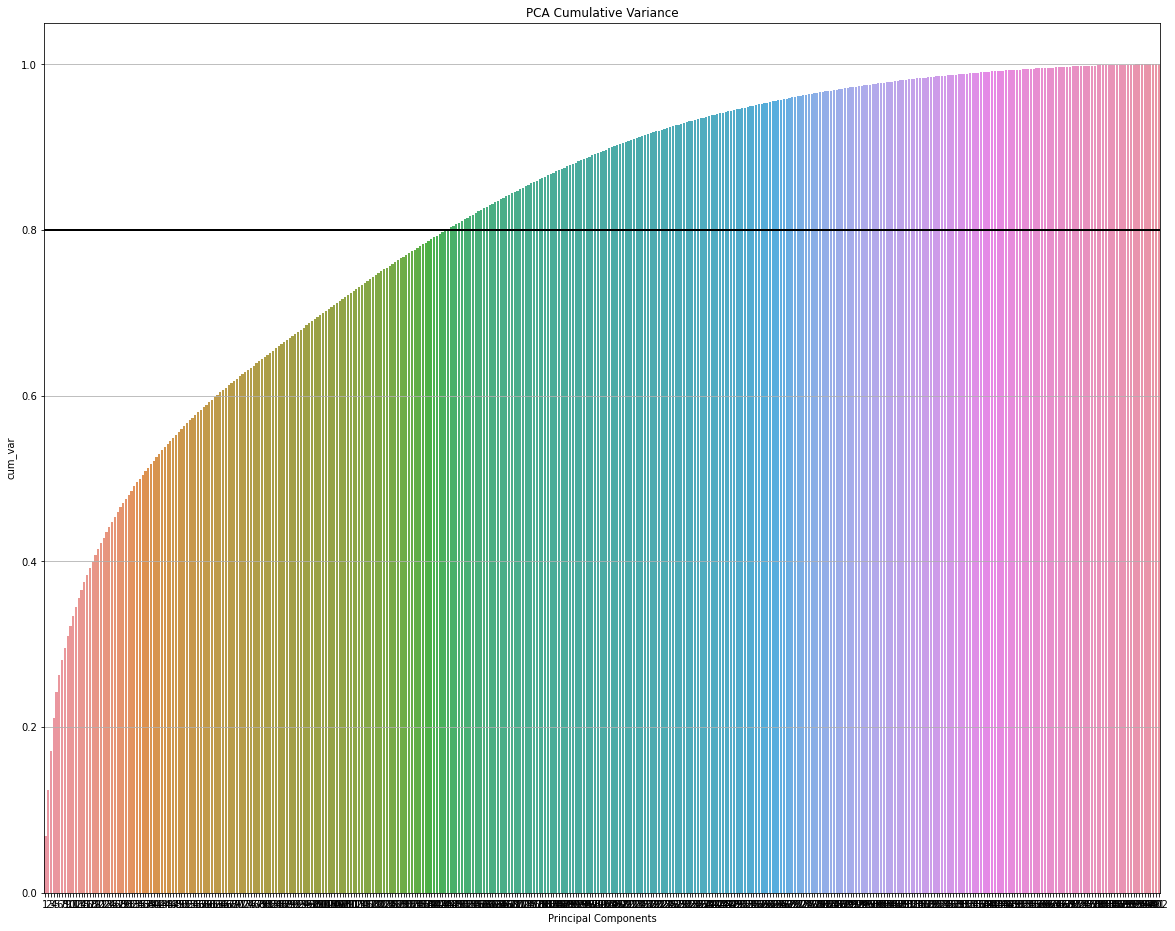

In [5]:
PCA_functions.plot_cum_var_plus_threshold(azdias_cum_explained_var_df)

In [6]:
azdias_PCA_df, azdias_feature_weights = PCA_functions.create_PCA_with_threshold(azdias_clean, N_features)
customers_PCA_df, azdias_feature_weights = PCA_functions.create_PCA_with_threshold(customers_clean, N_features)


In [10]:
# explore feature weights
top_azdias_0, bottom_azdias_0 =PCA_functions.explore_feature_weights(azdias_feature_weights, 0, 5)


In [11]:
print(top_azdias_0)
print(bottom_azdias_0)

VERS_TYP            0.135736
NATIONALITAET_KZ    0.132716
HEALTH_TYP          0.130054
SEMIO_VERT          0.122927
ALTER_HH            0.118928
Name: PC1, dtype: float64
FINANZ_SPARER           -0.125017
FINANZ_UNAUFFAELLIGER   -0.125104
FINANZ_ANLEGER          -0.129134
D19_KONSUMTYP_MAX       -0.136616
KOMBIALTER              -0.144523
Name: PC1, dtype: float64


1. first component. 
- VERS_TYP is insurance typlogy and levels relate to some kind of 'risk' scale. 
- NatIONALITAET_KZ is a nationality guess split by whether the name sounds German or not. 
- HEALTH_TYP is a topological health factor so unsure what that genuinely means. 
- SEMIO_VERT = "affinity indicating in what way teh person is dreamily", 
- ALTER_HH main person age. 
- KOMBIALTER is not in the spread sheet, but could be a car age indicator
- D19_KONSUMTYP_MAX consumtion type, probably related to the product the mailout camplaign is about
- FINANZ: all are some kind of financial typology indicators. investors, savers etc

Further discussions need to happen around the data ethics of some of these factors and the goal of the mailout campaign and models. If there is any impact on product pricing with what is being mailed out, i.e. discount codes you do not want to be in the position where available discounts are dictated by affluence or financial/social vunerability. 

In [9]:
# # Kmeans clustering now.

# # commenting out because this step takes over an hour to run
# scores = Clustering_functions.how_many_clusters(azdias_PCA_df, 2,20,1)

FINANZ_ANLEGER      -0.129134
D19_KONSUMTYP_MAX   -0.136616
KOMBIALTER          -0.144523
Name: PC1, dtype: float64


Viewing the saved graph, I've made the decision to create 16 clusters. 

In [12]:
# # the graph created suggest to use about 16 clusters.
n_cluster = 16

In [13]:
# apply clustering fit and predictions for azdias
azdias_cluster_clf, azdias_cluster_predict, cluster_centers_df = Clustering_functions.fit_clusters(azdias_PCA_df, n_cluster)
# apply prediction only on customers
customers_cluster_predict = azdias_cluster_clf.predict(customers_PCA_df)

In [14]:
azdias_cluster_tots = Clustering_functions.cluster_proportion(azdias_cluster_predict)
customers_cluster_tots = Clustering_functions.cluster_proportion(customers_cluster_predict)


In [15]:
# create plot
Clustering_functions.plot_cluster_proportion(azdias_cluster_tots, customers_cluster_tots)


<Figure size 432x288 with 0 Axes>

In [16]:
cluster_compare = Clustering_functions.create_comparison_df(azdias_cluster_tots, customers_cluster_tots)
# Clustering_functions.plot_cluster_compare(cluster_compare)

In [17]:
azdias_cluster_clf, azdias_cluster_predict, cluster_centers_df = Clustering_functions.fit_clusters(azdias_PCA_df, n_cluster)

In [ ]:
# cluster_centers_df.to_csv('data/cluster_centers_df.csv')